In [1]:
#Librerías
import requests
import numpy as np
import pandas as pd
import json
from bs4 import BeautifulSoup as BS

In [1]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as BS

#company = 'daedalus-data-decisions-and-language'
#company = 'innoviti'
url = 'https://www.santanderx.com/calls'#+ company
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "Accept-Language": "en-US,en;q=0.5", "Accept-Encoding": "gzip, deflate", "DNT": "1", "Connection": "close", "Upgrade-Insecure-Requests": "1"}

r = requests.get(url, headers=headers, timeout = 3)
#print(r.content)
r.status_code

200

In [19]:
#r.text

In [16]:
soup = BS(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="es">
 <head>
  <base href="/"/>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <meta content="all" name="robots"/>
  <meta content="es" name="language"/>
  <meta content="width=device-width,minimum-scale=1,initial-scale=1,user-scalable=yes" name="viewport"/>
  <title>
   Santander X - La comunidad global de emprendimiento de Banco Santander
  </title>
  <meta content="¿Quieres impulsar tu idea o escalar tu solución e incrementar su impacto en todo el mundo? A través de Santander X, la comunidad global de emprendimiento de Banco Santander, apoyamos la formación y desarrollo de empresas emergentes innovadoras y promovemos la internacionalización y digitalización de las PYMEs, al acompañar al emprendedor a lo largo de cada etapa de su travesía. Gracias a nuestra comunidad de emprendimiento, disponemos de acceso a recursos internacionales para impulsar sus soluciones, como son formación, visibilidad, mentoría y networking." name="descrip

In [14]:
soup.find_all('header')

[]

In [26]:
r.cookies

<RequestsCookieJar[Cookie(version=0, name='incap_ses_504_2263889', value='JhyfbcscBSLjExDwpZH+BoViwGEAAAAACeZ7+gOctWBODPMnAD7pkA==', port=None, port_specified=False, domain='.santanderx.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=None, discard=True, comment=None, comment_url=None, rest={'SameSite': 'None'}, rfc2109=False), Cookie(version=0, name='___utmvaXRumtZIZ', value='wzY\x01qVUX', port=None, port_specified=False, domain='www.santanderx.com', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=True, expires=1639998986, discard=False, comment=None, comment_url=None, rest={'SameSite': 'None'}, rfc2109=False), Cookie(version=0, name='___utmvbXRumtZIZ', value='IZc\r\n    XlgOkalV: Gtf', port=None, port_specified=False, domain='www.santanderx.com', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=True, expires=1639998986, discard=False, comment=None, c

In [22]:
cookies = {
     'incap_ses_504_2263889':'nZ5kfiGjNHeqxwPwpZH+Bn5awGEAAAAAp++2XRhkus+4uLsRU9J1zg==',
     'nlbi_2263889':'KOEnVweMIUAlViMBMyiL4wAAAABYti4MeyAvwOjuHRm9ncsy',
     'visid_incap_2263889':'P3kimNk/SLu2U4W6jeGPnX5awGEAAAAAQUIPAAAAAAAddv2j4j4yDmIzQmIBcT6l'
}

In [30]:
#headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "Accept-Language": "en-US,en;q=0.5", "Accept-Encoding": "gzip, deflate", "DNT": "1", "Connection": "close", "Upgrade-Insecure-Requests": "1"}
#headers= {'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405'}
header = {'Content-Type': 'text/html; charset=utf-8'}
#r = requests.get(url, headers=headers, cookies=cookies, timeout = 3)
r = requests.get(url)
#print(r.content)
#r.status_code
soup = BS(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="es">
 <head>
  <base href="/"/>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <meta content="all" name="robots"/>
  <meta content="es" name="language"/>
  <meta content="width=device-width,minimum-scale=1,initial-scale=1,user-scalable=yes" name="viewport"/>
  <title>
   Santander X - La comunidad global de emprendimiento de Banco Santander
  </title>
  <meta content="¿Quieres impulsar tu idea o escalar tu solución e incrementar su impacto en todo el mundo? A través de Santander X, la comunidad global de emprendimiento de Banco Santander, apoyamos la formación y desarrollo de empresas emergentes innovadoras y promovemos la internacionalización y digitalización de las PYMEs, al acompañar al emprendedor a lo largo de cada etapa de su travesía. Gracias a nuestra comunidad de emprendimiento, disponemos de acceso a recursos internacionales para impulsar sus soluciones, como son formación, visibilidad, mentoría y networking." name="descrip

Observamos que la web esta construída en Javascript que publica un primer código html con funciones javascript por lo que no es el html de donde podemos extraer los datos.  
Analizamos la web con Firefox (herramienta de inspeccionar)
Con la opción de **Red**, analizamos los eventos que se producen al hacer petición al servidor  
<img src="Inspector_Firefox.jpg"
     alt="Inspector de Firefox"
     style="float: left; margin-right: 10px;" />
Observamos que hay una petición de información a una **API REST** que devuelve un **JSON** donde se encuentran los datos que queremos extraer asique cambiamos de estrategia y trabajamos con la api y el json directamente:  
- Convocatorias: https://api-manager.universia.net/santanderx-core/api/calls/find?offset=0&limit=6  
- Eventos: https://api-manager.universia.net/santanderx-events/api/events?offset=0&limit=3

### MEJOR OPCIÓN: Parsing Json

In [15]:
#headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "Accept-Language": "en-US,en;q=0.5", "Accept-Encoding": "gzip, deflate", "DNT": "1", "Connection": "close", "Upgrade-Insecure-Requests": "1"}

open_status = 6 #convocatorias abiertas
close_status = 1 #Convocatorias cerradas
url = 'https://api-manager.universia.net/santanderx-core/api/calls/find?offset='+str(close_status)+'&limit='+ str(open_status)

r = requests.get(url)

print(r.status_code)
print(r.headers['content-type'])
print(r.text[:1000])

200
application/json; charset=utf-8
{
"data":{"limit":6,"size":6,"offset":1,"total":575,"results":[{"_id":"619c02ec0b2afa00164dd7e1","id":"619c02ec0b2afa00164dd7e1","name":"Banco Santander Training | PREMIO REVELACIÓN PUCV 2021 - 2º Semestre.","workingGroupId":"5dfb5e55b4f728001bcc1822","entityId":"5c54230fe5131b00142a96cc","entityName":"Pontificia Universidad Católica de Valparaíso","entityCountry":"CL","programId":"","shortDescription":"Buscamos proyectos estudiantiles que se desarrollen en el marco de una asignatura de pre-grado. ","edition":"3°","timeZone":"America/Santiago","gallery":[{"fileName":"foto_0000000120161108165643 (1).jpg","access":"PUBLIC","idDoc":"uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f","url":"https://pro-santanderx-images-s3.s3.eu-west-1.amazonaws.com/uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f"}],"status":"OPEN","onStageDateEnd":1640833199000,"onStageDateStart":1638327600000,"award":true,"reward":"JTNDcCUzRVBSRU1JQUNJJUQzTiUzQy9wJTNFJTNDb2wlM0UlM0NsaSUzRVBy

In [22]:
data = json.loads(r.text)
print(type(data))
print(json.dumps(data, indent=1))

<class 'dict'>
{
 "data": {
  "limit": 6,
  "size": 6,
  "offset": 1,
  "total": 575,
  "results": [
   {
    "_id": "619c02ec0b2afa00164dd7e1",
    "id": "619c02ec0b2afa00164dd7e1",
    "name": "Banco Santander Training | PREMIO REVELACI\u00d3N PUCV 2021 - 2\u00ba Semestre.",
    "workingGroupId": "5dfb5e55b4f728001bcc1822",
    "entityId": "5c54230fe5131b00142a96cc",
    "entityName": "Pontificia Universidad Cat\u00f3lica de Valpara\u00edso",
    "entityCountry": "CL",
    "programId": "",
    "shortDescription": "Buscamos proyectos estudiantiles que se desarrollen en el marco de una asignatura de pre-grado. ",
    "edition": "3\u00b0",
    "timeZone": "America/Santiago",
    "gallery": [
     {
      "fileName": "foto_0000000120161108165643 (1).jpg",
      "access": "PUBLIC",
      "idDoc": "uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f",
      "url": "https://pro-santanderx-images-s3.s3.eu-west-1.amazonaws.com/uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f"
     }
    ],
    "status

In [54]:
int(data['data']['limit'])

6

In [44]:
data['data']['results'][0]#['entityName'] #Selección del primer registro

{'_id': '619c02ec0b2afa00164dd7e1',
 'id': '619c02ec0b2afa00164dd7e1',
 'name': 'Banco Santander Training | PREMIO REVELACIÓN PUCV 2021 - 2º Semestre.',
 'workingGroupId': '5dfb5e55b4f728001bcc1822',
 'entityId': '5c54230fe5131b00142a96cc',
 'entityName': 'Pontificia Universidad Católica de Valparaíso',
 'entityCountry': 'CL',
 'programId': '',
 'shortDescription': 'Buscamos proyectos estudiantiles que se desarrollen en el marco de una asignatura de pre-grado. ',
 'edition': '3°',
 'timeZone': 'America/Santiago',
 'gallery': [{'fileName': 'foto_0000000120161108165643 (1).jpg',
   'access': 'PUBLIC',
   'idDoc': 'uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f',
   'url': 'https://pro-santanderx-images-s3.s3.eu-west-1.amazonaws.com/uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f'}],
 'status': 'OPEN',
 'onStageDateEnd': 1640833199000,
 'onStageDateStart': 1638327600000,
 'award': True,
 'reward': 'JTNDcCUzRVBSRU1JQUNJJUQzTiUzQy9wJTNFJTNDb2wlM0UlM0NsaSUzRVByaW1lciUyMEx1Z2FyJTIwRW1wcmVuZGVkb3

### Opción 2: Descarga a través de Pandas

In [4]:
open_status = 6 #convocatorias abiertas
close_status = 1 #Convocatorias cerradas
url = 'https://api-manager.universia.net/santanderx-core/api/calls/find?offset='+str(close_status)+'&limit='+ str(open_status)
df = pd.read_json(url)
df

,data,status
limit,6,200
offset,1,200
results,"[{'_id': '619c02ec0b2afa00164dd7e1', 'id': '61...",200
size,6,200
total,575,200


In [9]:
df['data'][2]

[{'_id': '619c02ec0b2afa00164dd7e1',
  'id': '619c02ec0b2afa00164dd7e1',
  'name': 'Banco Santander Training | PREMIO REVELACIÓN PUCV 2021 - 2º Semestre.',
  'workingGroupId': '5dfb5e55b4f728001bcc1822',
  'entityId': '5c54230fe5131b00142a96cc',
  'entityName': 'Pontificia Universidad Católica de Valparaíso',
  'entityCountry': 'CL',
  'programId': '',
  'shortDescription': 'Buscamos proyectos estudiantiles que se desarrollen en el marco de una asignatura de pre-grado. ',
  'edition': '3°',
  'timeZone': 'America/Santiago',
  'gallery': [{'fileName': 'foto_0000000120161108165643 (1).jpg',
    'access': 'PUBLIC',
    'idDoc': 'uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f',
    'url': 'https://pro-santanderx-images-s3.s3.eu-west-1.amazonaws.com/uploaded/ce427138-9aff-491a-b7d9-4558e7c9567f'}],
  'status': 'OPEN',
  'onStageDateEnd': 1640833199000,
  'onStageDateStart': 1638327600000,
  'award': True,
  'reward': 'JTNDcCUzRVBSRU1JQUNJJUQzTiUzQy9wJTNFJTNDb2wlM0UlM0NsaSUzRVByaW1lciUyMEx1Z2

## Transforming data into DataFrames

Podemos construir marcos de datos a partir de datos JSON creando primero las columnas (Serie) y luego rellenando una fila por fragmento JSON que se recupera.

In [42]:
data['data']['results'][0]['beneficiariesQuantity']

20

In [49]:
print(type(data['data']['results'][0]['name']))
data['data']['results'][0]['name']

<class 'str'>


'Banco Santander Training | PREMIO REVELACIÓN PUCV 2021 - 2º Semestre.'

## Script Final de descarga y transformación en Dataframe

In [96]:
#Script Final de descarga y transformación en Dataframe
open_status = 575 #convocatorias abiertas
close_status = 0 #Convocatorias cerradas
url = 'https://api-manager.universia.net/santanderx-core/api/calls/find?offset='+str(close_status)+'&limit='+ str(open_status)

r = requests.get(url)
data = json.loads(r.text)


df_calls = pd.DataFrame(columns=['name', 'entityName', 'entityCountry', 'shortDescription', 'edition', 'status', 
                                    'onStageDateStart', 'onStageDateEnd', 'award', 'shortReward', 'beneficiariesQuantity',
                                    'projectStatus', 'format', 'target'])

for i in range(int(data['data']['limit'])):
    title = data['data']['results'][i]['name']
    entity = data['data']['results'][i]['entityName']
    country = data['data']['results'][i]['entityCountry']
    description = data['data']['results'][i]['shortDescription']
    edition = data['data']['results'][i]['edition']
    status = data['data']['results'][i]['status']
    start_date = data['data']['results'][i]['onStageDateStart']
    end_date = data['data']['results'][i]['onStageDateEnd']
    award= data['data']['results'][i]['award']
    budget = data['data']['results'][i]['shortReward']
    beneficiaries = data['data']['results'][i]['beneficiariesQuantity']
    projectStatus = data['data']['results'][i]['projectStatus']
    formating = data['data']['results'][i]['format'] 
    target = data['data']['results'][i]['target']
    
    df_calls.loc[i] = [title, entity, country, description, edition, status, start_date, end_date, award, \
                       budget, beneficiaries, projectStatus, formating, target]

df_calls

,name,entityName,entityCountry,shortDescription,edition,status,onStageDateStart,onStageDateEnd,award,shortReward,beneficiariesQuantity,projectStatus,format,target
0,PROGRAMA VLC/STARTUP 2021,Fundació Parc Científic Universitat de València,ES,La Fundació Parc Científic UV y Banco Santande...,VII edición,OPEN,1639609200000,1640818799000,True,Espacio de trabajo en el Parc Científic UV y d...,7,[PREINCUBATION],ON_LINE,ENTREPRENEUR
1,Banco Santander Training | PREMIO REVELACIÓN P...,Pontificia Universidad Católica de Valparaíso,CL,Buscamos proyectos estudiantiles que se desarr...,3°,OPEN,1638327600000,1640833199000,True,$200.000 pesos,20,[PREINCUBATION],ON_LINE,ENTREPRENEUR
2,ACTIVIDAES FORMATIVAS DE ESPECIALIZACIÓN EN EM...,Universitat de València,ES,Convocatoria de 480 becas para la realización ...,2ª,OPEN,1616623200000,1640987999000,True,Las becas eximen a los beneficiarios del pago ...,480,[PREINCUBATION],ON_LINE,ENTREPRENEUR
3,Redemprendia Landing,Fundación Parque Científico de Madrid,ES,Programa de apoyo a la internacionalización de...,,OPEN,1546293600000,1640987999000,,,17,"[LAUNCH, ACCELERATE]",ON_SITE,ENTREPRENEUR
4,PROGRAMA EMPRÈN UPC,Universitat Politècnica de Catalunya,ES,Programa de pre-Incubación de proyectos de bas...,5,OPEN,1617231600000,1640991599000,,,30,[PREINCUBATION],ON_SITE,ENTREPRENEUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,StartInnova,Universidad de Oviedo,ES,STARTinnova es un programa cuyo objetivo es fo...,2019,CLOSED,1546297200000,1551481199000,,,1,"[PREINCUBATION, LAUNCH]",ON_SITE,ENTREPRENEUR
571,Premio IDEACME,ACME,BR,Premiamos las mejores ideas de los jóvenes emp...,XII,CLOSED,1550790000000,1551049199000,True,200.000€ + Programa de aceleración a medida,1,[PREINCUBATION],ON_LINE,ENTREPRENEUR
572,Workshop emprendimiento: VISUAL THINKING - El ...,ESIC Business & Marketing School,ES,Visual Thinking es el nuevo lenguaje de equipo...,2019,CLOSED,1550617200000,1550789999000,,,1,[PREINCUBATION],ON_SITE,ENTREPRENEUR
573,Citas Con Éxito. El caso de Cova Orejas.,Universidad de Oviedo,ES,Charlas de emprendedores para estudiantes de u...,2019,CLOSED,1548975600000,1550703599000,,,1,[PREINCUBATION],ON_SITE,ENTREPRENEUR


In [4]:
df_calls.to_csv('BD_Convocatorias_SantanderX.csv') #Guardamos a csv para análisis posterior

## Análisis de datos preliminares  
#### Proyectos propios de Santander X  
<img src="images/Logo_SantanderX.png" alt="alt text" width="150" align="left"/>

In [136]:
df_calls = pd.read_csv('BD_Convocatorias_SantanderX.csv', index_col=0)

In [3]:
len(df_calls) #Convocatorias de proyectos totales

575

In [137]:
#df_calls[(df_calls['entityName'].str.contains('Banco Santander')) | (df_calls['entityCountry'] == 'ES')]
#df_calls[df_calls['entityCountry'] == 'ES']
#Seleccionamos las convocatorias gestionadas por Santander X
df_SantX = df_calls[df_calls['name'].str.contains('Santander X')]

In [138]:
len(df_SantX)

45

In [7]:
#Convocatorias del Banco santander en España
len(df_calls[(df_calls['name'].str.contains('Santander')) & (df_calls['entityCountry'] == 'ES')])

53

In [153]:
#Análizamos las convocatorias de Santander X
#Agrupación por países
df_SantX.groupby('entityCountry')['entityCountry'].count().sort_values(ascending=False)
df_SantX['entityCountry'].value_counts(normalize=True) * 100

ES    33.333333
BR    26.666667
GB    15.555556
CL     8.888889
MX     6.666667
US     6.666667
UY     2.222222
Name: entityCountry, dtype: float64

In [48]:
#Agrupamos por entidad colaboradora
df_SantX.groupby('entityName')['entityName'].count().sort_values(ascending=False).head(10)               

entityName
Santander X                                  7
Oxentia Foundation                           4
Babson College                               3
Banco Santander Chile                        2
Universidade de Campinas                     2
Universidade Federal do Rio Grande do Sul    2
Universidade Federal de Minas Gerais         2
Universidad de Chile                         2
Universidad Rovira i Virgili                 2
Santander Universidades México               2
Name: entityName, dtype: int64

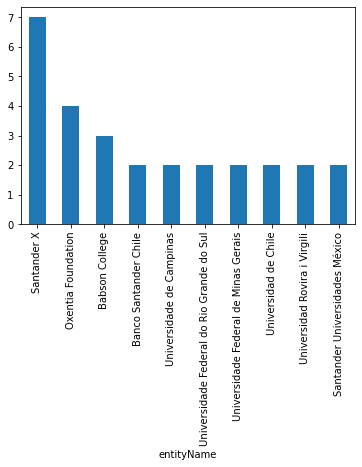

In [154]:
df_SantX.groupby('entityName')['entityName'].count().sort_values(ascending=False).head(10).plot.bar();

In [49]:
#Entidades más colaboradoras con Santander X en España
df_calls[(df_calls['name'].str.contains('Santander X')) & (df_calls['entityCountry'] == 'ES')] \
                    .groupby('entityName')['entityName'].count().sort_values(ascending=False)

entityName
Santander X                                      7
Centro Internacional Santander Emprendimiento    2
Santander Universidades España                   2
Universidad Rovira i Virgili                     2
Fundación Universidad Carlos III                 1
IE Foundation                                    1
Name: entityName, dtype: int64

In [50]:
#Número de beneficiarios
df_SantX['beneficiariesQuantity'].sum()

570

In [51]:
#Agrupación por el tipo de objetivo
df_SantX.groupby('target')['target'].count().sort_values(ascending=False)

target
ENTREPRENEUR    40
MENTOR           5
Name: target, dtype: int64

In [52]:
#Calculamos la celda anterior (Tipo de objetivo) en porcentaje
df_SantX['target'].value_counts(normalize=True) * 100

ENTREPRENEUR    88.888889
MENTOR          11.111111
Name: target, dtype: float64

In [115]:
print(df_SantX['projectStatus'].values[0]) #Observamos que lo está tomando como un string al tener las dobles comillas
print(type(df_SantX['projectStatus'].values[0]))

['ACCELERATE']
<class 'str'>


In [116]:
#Convertimos los valores de str a list
from ast import literal_eval
df_SantX['projectStatus'] = df_SantX['projectStatus'].apply(literal_eval)
print(type(df_SantX['projectStatus'].values[0]))

<class 'list'>


<ipython-input-116-537ef9c82a72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SantX['projectStatus'] = df_SantX['projectStatus'].apply(literal_eval)


In [108]:
#Ahora podemos tratarlo como una lista y aplicar una lista de comprensión para recorrer cada valor de lista de la Serie
#Agrupación de la tipología de proyectos. ###ESTO FUNCIONA SI EL TIPO DE LA COLUMNA ES LIST pero no STR###
pd.Series([x for item in df_SantX['projectStatus'] for x in item]).value_counts()

PREINCUBATION    23
ACCELERATE       14
LAUNCH           14
GROWTH           10
REINVENT          2
dtype: int64

In [10]:
#Lo convertimos en porcentajes
pd.Series([x for item in df_SantX['projectStatus'] for x in item]).value_counts(normalize=True) * 100

PREINCUBATION    36.507937
ACCELERATE       22.222222
LAUNCH           22.222222
GROWTH           15.873016
REINVENT          3.174603
dtype: float64

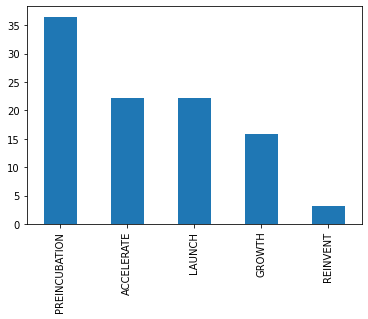

In [12]:
#Lo convertimos en porcentajes
fase = pd.Series([x for item in df_SantX['projectStatus'] for x in item]).value_counts(normalize=True) * 100
fase.plot.bar();

In [66]:
df_SantX['projectStatus'].describe()

count                    45
unique                   10
top       ['PREINCUBATION']
freq                     21
Name: projectStatus, dtype: object

In [39]:
#Porcenytaje de proyectos que son Premios
df_SantX['award'].value_counts(normalize=True) * 100

True    57.777778
        42.222222
Name: award, dtype: float64

In [40]:
#Porcentaje de formato de los proyectos presencial u online
df_SantX['format'].value_counts(normalize=True) * 100

ON_LINE            73.333333
ON_SITE            24.444444
SEMI_PRESENTIAL     2.222222
Name: format, dtype: float64

In [41]:
df_SantX[df_SantX['status'] == 'OPEN']

,name,entityName,entityCountry,shortDescription,edition,status,onStageDateStart,onStageDateEnd,award,shortReward,beneficiariesQuantity,projectStatus,format,target
18,Santander X Training | Impulsionar com Prosper...,Impulsa,MX,150 vagas para curso online + os 10 melhores r...,Brasil,OPEN,1635386400000,1642730399000,,,150,[ACCELERATE],ON_LINE,ENTREPRENEUR


In [6]:
#Tratamos las Columnas de Fecha
#Se trata de un formato de 'Tiempo UNIX' representado en milisegundos desde el 1 de enero de 1970
#Más info en https://es.wikipedia.org/wiki/Tiempo_Unix
#Resuelto en https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe
#pd.to_datetime(df_SantX['onStageDateEnd'])
pd.to_datetime(df_SantX['onStageDateEnd'], unit='ms').head()

18   2022-01-21 01:59:59
34   2021-12-23 22:00:00
48   2021-12-17 05:59:59
49   2021-12-16 05:59:59
55   2021-12-09 22:59:59
Name: onStageDateEnd, dtype: datetime64[ns]

In [7]:
#Con este método Convertimos las dos columnas a datetime type
df_SantX['onStageDateStart'] = pd.to_datetime(df_SantX['onStageDateStart'], unit='ms')
df_SantX['onStageDateEnd'] = pd.to_datetime(df_SantX['onStageDateEnd'], unit='ms')

<ipython-input-7-fc967462f373>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SantX['onStageDateStart'] = pd.to_datetime(df_SantX['onStageDateStart'], unit='ms')
<ipython-input-7-fc967462f373>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SantX['onStageDateEnd'] = pd.to_datetime(df_SantX['onStageDateEnd'], unit='ms')


In [10]:
#Medimos el tiempo medio de los proyectos y generamos una nueva variable
df_SantX['duration'] = df_SantX['onStageDateEnd'] - df_SantX['onStageDateStart']

<ipython-input-10-7206d62d1f53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SantX['duration'] = df_SantX['onStageDateEnd'] - df_SantX['onStageDateStart']


In [11]:
df_SantX

,name,entityName,entityCountry,shortDescription,edition,status,onStageDateStart,onStageDateEnd,award,shortReward,beneficiariesQuantity,projectStatus,format,target,duration
18,Santander X Training | Impulsionar com Prosper...,Impulsa,MX,150 vagas para curso online + os 10 melhores r...,Brasil,OPEN,2021-10-28 02:00:00,2022-01-21 01:59:59,NaN,NaN,150,['ACCELERATE'],ON_LINE,ENTREPRENEUR,84 days 23:59:59
34,Santander X United Kingdom Award | GCU UHatch ...,Glasgow Caledonian University,GB,GCU-UHatch companies may apply for seed fundin...,December 2021,INPROGRESS,2021-12-23 22:00:00,2021-12-23 22:00:00,True,"Phase 1 - Up to £1,000\nPhase 2 - Up to £5,000...",10,"['PREINCUBATION', 'LAUNCH', 'ACCELERATE']",SEMI_PRESENTIAL,ENTREPRENEUR,0 days 00:00:00
48,Premio Santander X | México - Categoría Acelera,Santander Universidades México,MX,Concurso de emprendimiento para el desarrollo...,I,CLOSED,2021-12-15 06:00:00,2021-12-17 05:59:59,True,Se otorgarán $1.6M de pesos distribuidos en am...,3,['ACCELERATE'],ON_LINE,ENTREPRENEUR,1 days 23:59:59
49,Premio Santander X | México - Categoría Lanza,Santander Universidades México,MX,Concurso de emprendimiento para el desarrollo...,I,CLOSED,2021-12-14 06:00:00,2021-12-16 05:59:59,True,"Se otorgarán $1.6M de pesos, distribuidos en ...",3,['LAUNCH'],ON_LINE,ENTREPRENEUR,1 days 23:59:59
55,Santander X Global Challenge | Finance For All,Oxentia Foundation,GB,"1 Challenge, 3 issues: adapt to demographic ch...",2021,CLOSED,2021-12-03 23:00:00,2021-12-09 22:59:59,True,"Global exposure, networking connections, and e...",6,"['ACCELERATE', 'GROWTH']",ON_LINE,ENTREPRENEUR,5 days 23:59:59
56,Santander X Brazil Award 2021 - Accelerate,Santander Universidades Brasil,BR,Apoiar o empreendedorismo brasileiro e acelera...,I,CLOSED,2021-12-06 02:00:00,2021-12-09 01:59:59,True,"Prêmio financeiro, mentoring, exposição e luga...",3,['PREINCUBATION'],ON_LINE,ENTREPRENEUR,2 days 23:59:59
57,Santander X Brazil Award 2021 - Launch,Santander Universidades Brasil,BR,Apoiar o empreendedorismo brasileiro e apoiar ...,I,CLOSED,2021-12-05 02:00:00,2021-12-07 01:59:59,True,"Prêmio financeiro, mentoring, exposição e luga...",3,['PREINCUBATION'],ON_LINE,ENTREPRENEUR,1 days 23:59:59
65,Santander X Chile Award 2021 - Accelerate,Banco Santander Chile,CL,Empoderar a emprendedores Chilenos para desarr...,I,CLOSED,2021-11-26 03:00:00,2021-11-29 02:59:59,True,"Premio económico, mentoría, exposición en medi...",3,['LAUNCH'],ON_LINE,ENTREPRENEUR,2 days 23:59:59
66,Santander X Chile Award 2021 - Launch,Banco Santander Chile,CL,Empoderar a emprendedores universitarios Chile...,I,CLOSED,2021-11-26 03:00:00,2021-11-29 02:59:59,True,"Premio económico, mentoría, exposición en medi...",3,['ACCELERATE'],ON_LINE,ENTREPRENEUR,2 days 23:59:59
68,Santander X Training | Prepare to Launch - Bab...,Babson College,US,"Leverage the expertise of Babson College, the ...",2021,CLOSED,2021-11-20 05:00:00,2021-11-28 04:59:59,True,Spend 7 weeks with Babson and get ready to lau...,100,['LAUNCH'],ON_LINE,ENTREPRENEUR,7 days 23:59:59


In [120]:
#Intentamos extraer del texto los presupuestos en números
#df_SantX['shortReward']

In [61]:
df_SantX['shortReward'].values[2]

'Se otorgarán $1.6M de pesos distribuidos en ambas categorías.'

In [65]:
#Pruebas de expresión regular para extraer los presupuestos
import re
regex = r"[£$€]\s*[.,\d]+|[.,\d]+\s*[£$€]|(?:Eur|dollars?)\s*[.,\d]+|[.,\d]+\s*(?:Eur|dollars?)"
re.findall(r'\b\d+\b', 'Phase 1 - Up to £1,000\nPhase 2 - Up to £5,000\n\n - 1,4')
#re.findall(r'(?P<value>[\d]*[.]?[\d]{1,2})\s*(?P<currency>\£|\$|euro|)s?', 'Phase 1 - Up to £1,000\nPhase 2 - Up to £5,000\n\n')
#df_SantX['shortReward'].str.extract("(\d*\.?\d+)", expand=True)
#df_SantX['shortReward'].str.extract('(?P<value>[\d]*[.]?[\d]{1,2})\s*(?P<currency>\£|\$|euro|)s?')
re.findall(regex, 'Phase 1 - Up to £1,000\nPhase 2 - Up to £5,000\n\n - 1,4')
#re.findall(regex, df_SantX['shortReward'].values[2])

['£1,000', '£5,000']

In [140]:
regex = r"[£$€]\s*[.,\d]+|[.,\d]+\s*[£$€]|(?:Eur|dollars?)\s*[.,\d]+|[.,\d]+\s*(?:Eur|dollars?)"
#df_SantX['shortReward'].str.findall(regex)
df_SantX['budget'] = df_SantX['shortReward'].str.findall(regex)

<ipython-input-140-a11dbf21e3a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SantX['budget'] = df_SantX['shortReward'].str.findall(regex)


In [60]:
df_calls.to_csv('BD_Convocatorias_SantanderX_conversion.csv')

In [ ]:
df_calls = pd.read_csv('BD_Convocatorias_SantanderX.csv', index_col=0)

In [101]:
#df_SantX['budget'].replace('.',',')
pd.set_option('max_colwidth', None) #Para poder visualizar todo el texto de la columna
df_SantX['shortReward']

18                                                                  NaN
34                   Phase 1 - Up to £1,000\nPhase 2 - Up to £5,000\n\n
48        Se otorgarán $1.6M de pesos distribuidos en ambas categorías.
49      Se otorgarán $1.6M de pesos, distribuidos  en ambas categorías.
55      Global exposure, networking connections, and expert mentoring! 
56             Prêmio financeiro, mentoring, exposição e lugar no SXGA.
57             Prêmio financeiro, mentoring, exposição e lugar no SXGA.
65      Premio económico, mentoría, exposición en medios y pase a SXGA.
66      Premio económico, mentoría, exposición en medios y pase a SXGA.
68      Spend 7 weeks with Babson and get ready to launch your startup!
69            Scale your SME, create an action plan, grow your network!
116                         Win up to £75,000 worth of business support
129     Premio económico, mentoría, exposición en medios y pase a SXGA.
130     Premio económico, mentoría, exposición en medios y pase 

In [130]:
#Cuando haya dos número en la lista intentamos sumarlos
#df_SantX['budget'].apply(pd.Series)
#df_SantX['budget'].str.contains('£')
#df_SantX.loc[df_SantX['budget'].str.contains('£|$|€', case=False)]
#df_SantX[df_SantX['budget'] == '£']
#df_SantX['budget'].str.split(',')
#df_SantX['budget'].apply(lambda x: list(map(str.upper, x)))
#df_SantX['budget'].apply(lambda x: x.findall(regex))

In [141]:
budget = df_SantX['budget'].explode().dropna().to_list()
df_SantX['budget'].explode().dropna().to_list()

['£1,000', '£5,000', '$1.6', '$1.6', '£75,000']

In [142]:
budget = df_SantX['budget'].explode().dropna().to_list()
df_SantX['budget'].explode().dropna().to_list()

['£1,000', '£5,000', '$1.6', '$1.6', '£75,000']

In [143]:
#Suma aproximada de las cifras según la conversión de monedas a Euros
budget_sum = []
for i in budget:
    if '$' in i:
        #print(int(i.replace('$','').replace('.','').replace(',','').replace(' ',''))*0.043)
        budget_sum.append(int(i.replace('$','').replace('.','').replace(',','').replace(' ',''))*0.043)
    elif '£' in i:
        #print(int(i.replace('£','').replace('.','').replace(',','').replace(' ',''))*0.84)
        budget_sum.append(int(i.replace('£','').replace('.','').replace(',','').replace(' ',''))*0.84)
    elif '€' in i:
        #print(int(i.replace('£','').replace('.','').replace(',','').replace(' ',''))*0.84)
        budget_sum.append(int(i.replace('€','').replace('.','').replace(',','').replace(' ','')))
    else:
        budget_sum.append(0)
sum(budget_sum)

68041.376

Haciendo el sumatorio y las conversiones de monedas, el presupuesto acumulado asciende a cerca de 3M de euros.

### Proyectos completos publicados en la plataforma de Santander X  

In [23]:
df_calls = pd.read_csv('BD_Convocatorias_SantanderX.csv', index_col=0)

In [24]:
len(df_calls) #Convocatorias de proyectos totales

575

In [14]:
#Agrupando convocatorias total pos países
df_calls['entityCountry'].value_counts(normalize=True) * 100

ES    51.304348
MX    11.478261
CL    10.782609
BR     7.826087
AR     6.434783
GB     4.521739
PT     3.478261
UY     1.913043
US     1.217391
DE     0.695652
CN     0.173913
FR     0.173913
Name: entityCountry, dtype: float64

In [17]:
df_calls.groupby('entityName')['entityName'].count().sort_values(ascending=False).head(10)

entityName
Santander Universidades México                   40
Universidad Rovira i Virgili                     26
Centro Internacional Santander Emprendimiento    22
Universidad de Barcelona                         19
Fundação de Desenvolvimento da Pesquisa          18
Universidad Siglo 21                             17
Universidad Autónoma de Madrid                   13
Universitat Autònoma de Barcelona                13
Universidad de Cádiz                             13
Universidad Politécnica de Cartagena             12
Name: entityName, dtype: int64

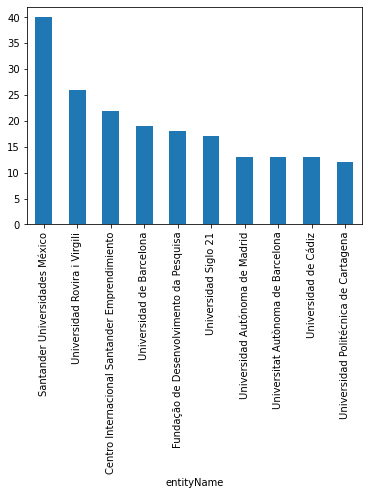

In [16]:
#Agrupamos por entidad colaboradora
df_calls.groupby('entityName')['entityName'].count().sort_values(ascending=False).head(10).plot.bar();

In [19]:
#Calculamos Tipo de objetivo en porcentaje
df_calls['target'].value_counts(normalize=True) * 100

ENTREPRENEUR    95.652174
MENTOR           4.173913
BOTH             0.173913
Name: target, dtype: float64

In [25]:
#Convertimos los valores de str a list en la columna 'projectStatus' para iterar sobre los elementos de la lista
from ast import literal_eval
df_calls['projectStatus'] = df_calls['projectStatus'].apply(literal_eval)
print(type(df_calls['projectStatus'].values[0])) #Comprobamos que ahora es de tipo lista

<class 'list'>


In [28]:
#Ahora podemos tratarlo como una lista y aplicar una f. de lista de comprensión para recorrer cada valor de lista de la Serie
#Agrupación de la tipología de proyectos. ###ESTO FUNCIONA SI EL TIPO DE LA COLUMNA ES LIST pero no STR###
pd.Series([x for item in df_calls['projectStatus'] for x in item]).value_counts()
#Lo convertimos en porcentajes
pd.Series([x for item in df_calls['projectStatus'] for x in item]).value_counts(normalize=True) * 100

PREINCUBATION    71.201158
LAUNCH           10.853835
ACCELERATE       10.564399
GROWTH            5.788712
REINVENT          1.591896
dtype: float64

In [29]:
#Porcenytaje de proyectos que son Premios
df_calls['award'].value_counts(normalize=True) * 100

True    100.0
Name: award, dtype: float64

In [32]:
#Porcentaje de proyectos que son premios
df_calls.groupby('award')['award'].count().sort_values(ascending=False) * 100 / len(df_calls)

award
True    32.0
Name: award, dtype: float64

In [139]:
#Porcentaje de formato de los proyectos presencial u online
df_calls['format'].value_counts(normalize=True) * 100

ON_LINE            72.000000
ON_SITE            25.391304
SEMI_PRESENTIAL     2.608696
Name: format, dtype: float64

In [33]:
#Convertimos las variables fechas a datetime
df_calls['onStageDateStart'] = pd.to_datetime(df_calls['onStageDateStart'], unit='ms')
df_calls['onStageDateEnd'] = pd.to_datetime(df_calls['onStageDateEnd'], unit='ms')

In [38]:
#Medimos el tiempo medio de los proyectos y generamos una nueva variable
df_calls['duration'] = df_calls['onStageDateEnd'] - df_calls['onStageDateStart']
df_calls['duration'].describe()

count                            575
mean      42 days 01:13:59.038264347
std      119 days 18:43:20.302552964
min                  0 days 00:00:00
25%                  7 days 23:59:59
50%                 18 days 23:59:59
75%                 39 days 23:59:59
max               1979 days 23:59:59
Name: duration, dtype: object

In [145]:
#Análizamos presupuestos a partir del texto presente en la variable 'shortReward'
regex = r"[£$€]\s*[.,\d]+|[.,\d]+\s*[£$€]|(?:Eur|dollars?)\s*[.,\d]+|[.,\d]+\s*(?:Eur|dollars?)"
#regex = r"[£$€]\s*[.,\d]+|[.,\d]+\s*[£$€]|[£$€]\s*[.,\d]+\s*[pesos]+|(?:Eur|dollars?)\s*[.,\d]+|[.,\d]+\s*(?:Eur|dollars|mil pesos|Mil pesos?)"
#df_SantX['shortReward'].str.findall(regex)
df_calls['budget'] = df_calls['shortReward'].str.findall(regex)

In [147]:
budget_all = df_calls['budget'].explode().dropna().to_list()
df_calls['budget'].explode().dropna().to_list()[:10]

['$200.000',
 '£2400',
 '$5.000.000.',
 '$1.000.000',
 '5000€',
 '£1,000',
 '£500',
 '£1,000',
 '£5,000',
 '$1.000.000']

In [107]:
pd.set_option('max_colwidth', None) #Para poder visualizar todo el texto de la columna
df_calls[df_calls['shortReward'].str.contains('300.000', na=False)]['shortReward']

505    $300,000 a $100,000 pesos de inversión en capital semilla.
522      1er. lugar:  $300.000 (ARS)\n2do. lugar: $150.000  (ARS)
Name: shortReward, dtype: object

In [148]:
#Suma aproximada de las cifras según la conversión de monedas a Euros
budget_sum = []
for i in budget_all:
    if '$' in i:
        #print(int(i.replace('$','').replace('.','').replace(',','').replace(' ',''))*0.043)
        budget_sum.append(int(i.replace('$','').replace('.','').replace(',','').replace(' ',''))*0.043)
    elif '£' in i:
        #print(int(i.replace('£','').replace('.','').replace(',','').replace(' ',''))*0.84)
        budget_sum.append(int(i.replace('£','').replace('.','').replace(',','').replace(' ',''))*0.84)
    elif '€' in i:
        #print(int(i.replace('£','').replace('.','').replace(',','').replace(' ',''))*0.84)
        budget_sum.append(int(i.replace('€','').replace('.','').replace(',','').replace(' ','')))
    else:
        budget_sum.append(0)
sum(budget_sum)

9325939.202